# FIT5149 S1 2020 Assessment 1: Bushfire Analysis using Meteorological Data


Student information
- Family Name: Patil
- Given Name: Kshitij
- Student ID: 29519136
- Student email: kpat0012@student.monash.edu

Programming Language: **R 4.0.0** in Jupyter Notebook

R Libraries used:
- tidyverse
- leaps
- caret
- corrplot
- glmnet
- GGaly
- Hmisc
- ggplot2
- cowplot
- psych
- reshape
- ranger

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

This assignment tasks us with the responsiblity of completeing an Exploratory Data Analysis and consequently building a Model from the selected features to accurately predict the **area** of the forest fires using some predictors variables like **(FFMC, ISI, rain, DMC, DC, temp, wind, month, day)**

There for what we are trying to do is create a model that minizes the rss or maximizes r2 values for model where:

- **X dependent = FFMC, ISI, rain, DMC, DC, RH, temp, wind, month, day**
- **Y indipendent = Area (continous variable)**

### Loading the data

In [1]:
options(warn=-1)
forestfires_data <- read.csv('forestfires.csv')

Lets look how the Dataset Dimensions look like - 

In [2]:
cat("The number of rows and columns are: ", dim(forestfires_data))

The number of rows and columns are:  517 13

What does the values and the dataset looks like

In [3]:
head(forestfires_data)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


Checking the datatypes of each column Data

In [4]:
str(forestfires_data)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: chr  "mar" "oct" "oct" "mar" ...
 $ day  : chr  "fri" "tue" "sat" "fri" ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


There is an inherent error in treating the month and day as character as it will treat each value as individual 
and will also not give the proper statistics while calling the summary in general we also want to know what levels are there and how much of a count for each level is there. This way it gives better understanding the what the data set looks like

In [5]:
#NOTE: We either can build the day or month into factors or a numberic value depending on what model
#we want to build

df1 <- data.frame(forestfires_data) # Creating Copy: To later reuse 
df1$month <- as.factor(df1$month)
df1$day <- as.factor(df1$day)
str(df1)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


In [6]:
print('Looking at the missing values')
colSums(is.na(df1))

[1] "Looking at the missing values"


X     Y month   day  FFMC   DMC    DC   ISI  temp    RH  wind  rain  area 
    0     0     0     0     0     0     0     0     0     0     0     0     0

In [7]:
summary(df1)

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

This data set is contains data about an event that ocurs in a spatial area and which is also time indipendent as mentioned in the research paper that was provided talking to the reponsible firefighter chief it was noted that majority of the data is missing in the data. The **Spatial-Temporal** data might just lose it value and cannot be exploited for the intrensic value that it provides us as a spatial and temporal data because the **data is this diparate** (*look at month values and day*)

In [8]:
library(psych)
round(describe(df1), 3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,517,4.669,2.314,4.00,4.672,2.965,1.0,9.00,8.00,0.036,-1.180,0.102
Y,2,517,4.300,1.230,4.00,4.308,1.483,2.0,9.00,7.00,0.415,1.378,0.054
month*,3,517,6.758,4.373,7.00,6.720,7.413,1.0,12.00,11.00,0.084,-1.719,0.192
day*,4,517,3.737,1.925,4.00,3.672,2.965,1.0,7.00,6.00,0.157,-1.109,0.085
FFMC,5,517,90.645,5.520,91.60,91.455,1.927,18.7,96.20,77.50,-6.537,66.139,0.243
DMC,6,517,110.872,64.046,108.30,106.522,51.743,1.1,291.30,290.20,0.544,0.179,2.817
DC,7,517,547.940,248.066,664.20,578.692,118.905,7.9,860.60,852.70,-1.094,-0.265,10.910
ISI,8,517,9.022,4.559,8.40,8.727,3.113,0.0,56.10,56.10,2.522,21.146,0.201
temp,9,517,18.889,5.807,19.30,19.091,5.337,2.2,33.30,31.10,-0.329,0.111,0.255


**Observation :**

- Rain has a extremly high skewed data with a unsusual extremely high Kurtosis
- Area has a extremly high skewed area with again high Kurtosis
- FFMC again is modelratly skewed with a High Kurtosis
- ISI has a high kurtosis again

These will be further looked at Expolratary Data Anlysis and we will look at what Data Transformations can be added on the dataset

In [9]:
#TODO:
library(tidyverse)
df1_subset <- select(df1, -c(month,day)) # Removing the error that might arrise due to factors
sort(apply(df1_subset[-15], 2, sd))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



rain           Y        wind           X         ISI        FFMC 
  0.2959591   1.2299004   1.7916526   2.3137778   4.5594772   5.5201108 
       temp          RH        area         DMC          DC 
  5.8066253  16.3174692  63.6558185  64.0464822 248.0661917

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

To understand more about the data and how the values corresponds to one another we will do some prelimary Data
Visulization. The aim of the Visuzlizations is to Explore the properties that might help in creating more precise prediction of the data by finding the pattern within the data

- We will do some outliers Analysis
- Look at the Distributions of the Data
- Spatial Analysis
- Temporal Analysis
- Correlation of the predictors within the Dataset



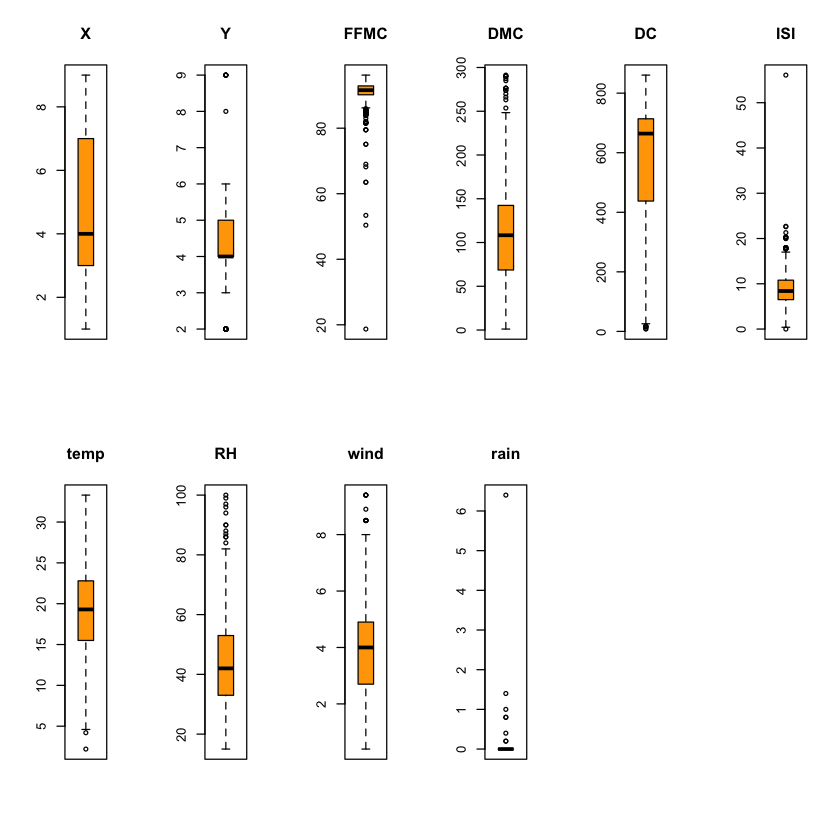

In [10]:
par(mfrow = c(2,6)) # 6 x 2 grid
for (i in 1:(length(df1_subset) - 1)) {
        boxplot(df1_subset[,i], main = names(df1_subset[i]), type="l", col = 'orange') # Unfortunately I like orange
}

**Observation:**

- One of the jey observation is that the there seems to be a lot of distributions that seemed to be skewed
- The same observations can also made here that we did while removving the skew of the Dataset i.e tmany values are skewed.
- Due to the small size of the boxplot the Rain dataset looks really small we might look at once more.
- One of the main question is that we can ask is are does the digram show that they are true Outliers?
- We can make even further go to check the data once again to see what values are causing this skew in rain.
- Do we Data Transform?

**Note:** The data for Month and Day are not included as we first they are factors and that we have already managed to make the obeservations that questions the consistency of the data interms of recording observation.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:dplyr’:

    nasa




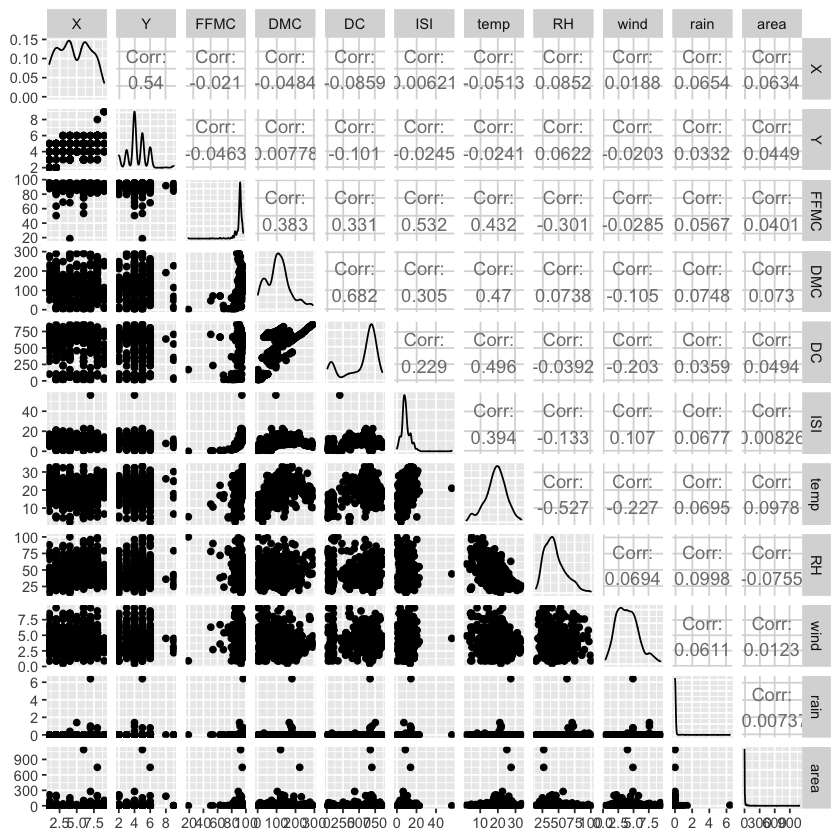

In [11]:
#Lets have a look at the Distribution of the Data
library(GGally)

ggpairs(df1_subset, bins=30)

**Observations:**

- The data for rain and area are heavily left skewed Transformations should be applied
- DC almost looks like a Bi-modal distribution
- so does DMC
- There are Discrepancy on the X and Y points that are available #Removed
- FFMC is right skewed Transformation may be required.

The Data did not clearly showed the Distribution therefore we will have a closer look by plotting the histogram for the data


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




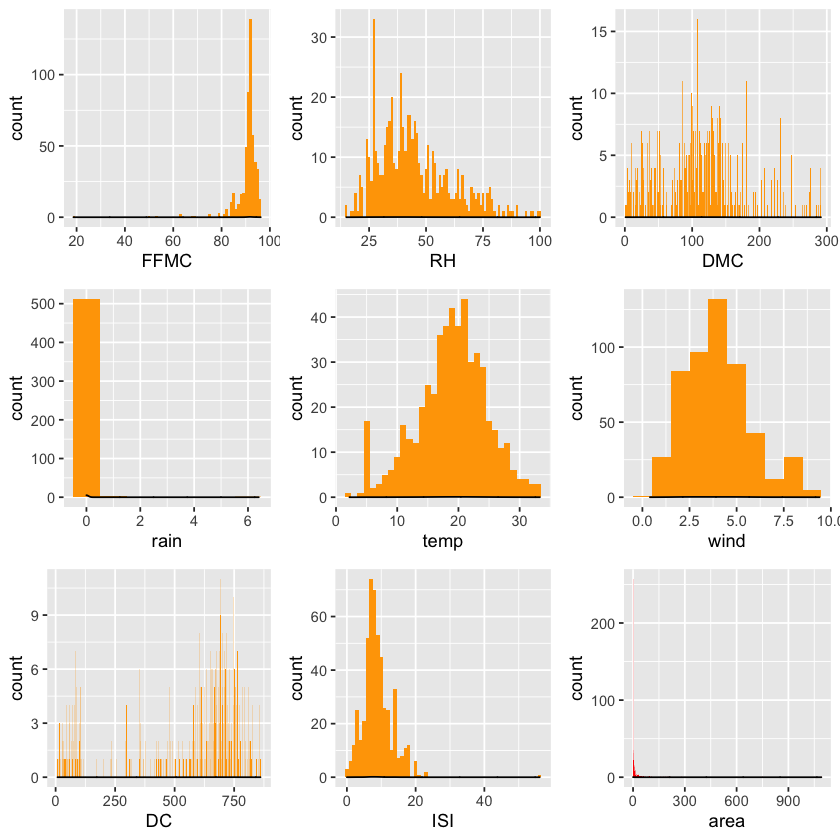

In [12]:
library(grid)
library(lattice)
library(gridExtra)

ffmc <- ggplot(forestfires_data,aes(x=FFMC)) +
    geom_histogram(binwidth = 1, fill="orange") +
    geom_density(alpha=.2, fill="#FF6666")

rh <- ggplot(forestfires_data,aes(x=RH)) +
    geom_histogram(binwidth = 1, fill="orange") +
    geom_density(alpha=.2, fill="#FF6666")

dmc <- ggplot(forestfires_data,aes(x=DMC)) +
    geom_histogram(binwidth = 1, fill="orange") +
    geom_density(alpha=.2, fill="#FF6666")

rain <- ggplot(forestfires_data,aes(x=rain)) +
    geom_histogram(binwidth = 1, fill="orange") +
    geom_density(alpha=.2, fill="#FF6666")

temp <- ggplot(forestfires_data,aes(x=temp)) +
    geom_histogram(binwidth = 1, fill="orange") +
    geom_density(alpha=.2, fill="#FF6666")

wind <- ggplot(forestfires_data,aes(x=wind)) +
    geom_histogram(binwidth = 1, fill="orange") +
    geom_density(alpha=.2, fill="#FF6666")

dc <- ggplot(forestfires_data,aes(x=DC)) +
    geom_histogram(binwidth = 1,fill="orange") +
    geom_density(alpha=.2, fill="#FF6666")

isi <- ggplot(forestfires_data,aes(x=ISI)) +
    geom_histogram(binwidth = 1,fill="orange") +
    geom_density(alpha=.2, fill="#FF6666")

area <- ggplot(forestfires_data,aes(x=area)) +
    geom_histogram(binwidth = 1, fill="red") +
    geom_density(alpha=.2, fill="#FF6666")

grid.arrange(ffmc, rh, dmc, rain, temp, wind, dc, isi, area, ncol = 3)

Area is not at all visible and as suspected ISI and Rain and FFMC show skewness. We will create another dataframw with the transformation so that we can cross check the model performance on that compared to the performance of non transformed data. We will also try and also explore Strandardisation also.

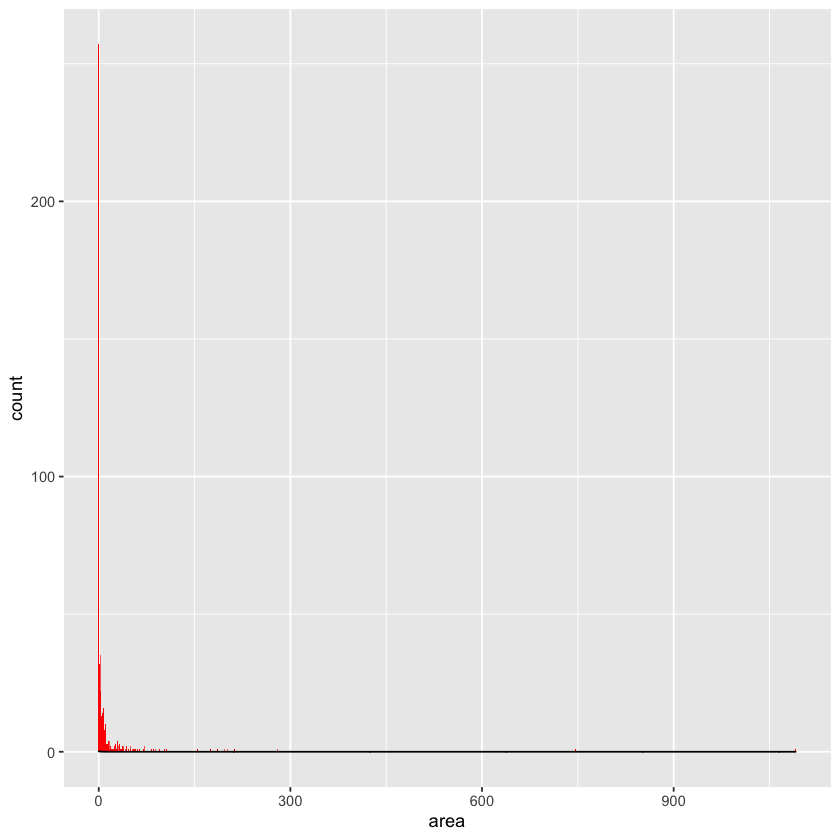

In [13]:
area

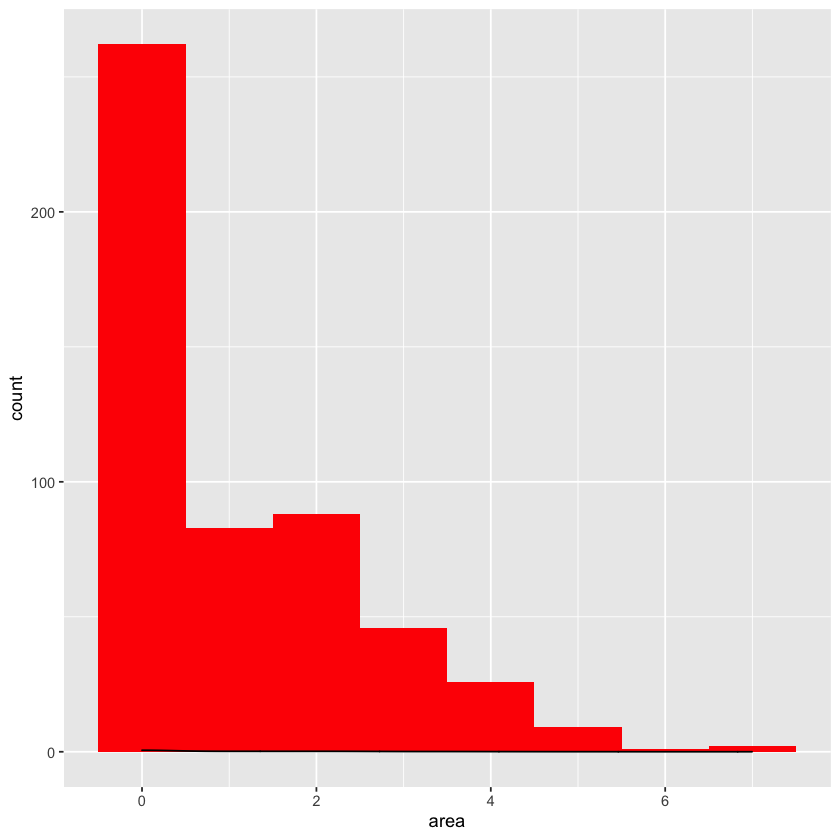

In [14]:
# Creating a transormation of the dataset
df2 <- data.frame(df1)
df2$area <- log(df2$area + 1) #remove 1

area <- ggplot(df2,aes(x=area)) +
    geom_histogram(binwidth = 1,fill="red") +
    geom_density(alpha=.2, fill="#FF6666")

area

The diagram though shows now a about normal distribution on the dataset this diagram can be really misleading this is primarly due to the fact minus infinty data has now been introduced which cannot be actually fiited into a linear model therefore we need to change the infity value into 0 and again see what it shows as the distribution.

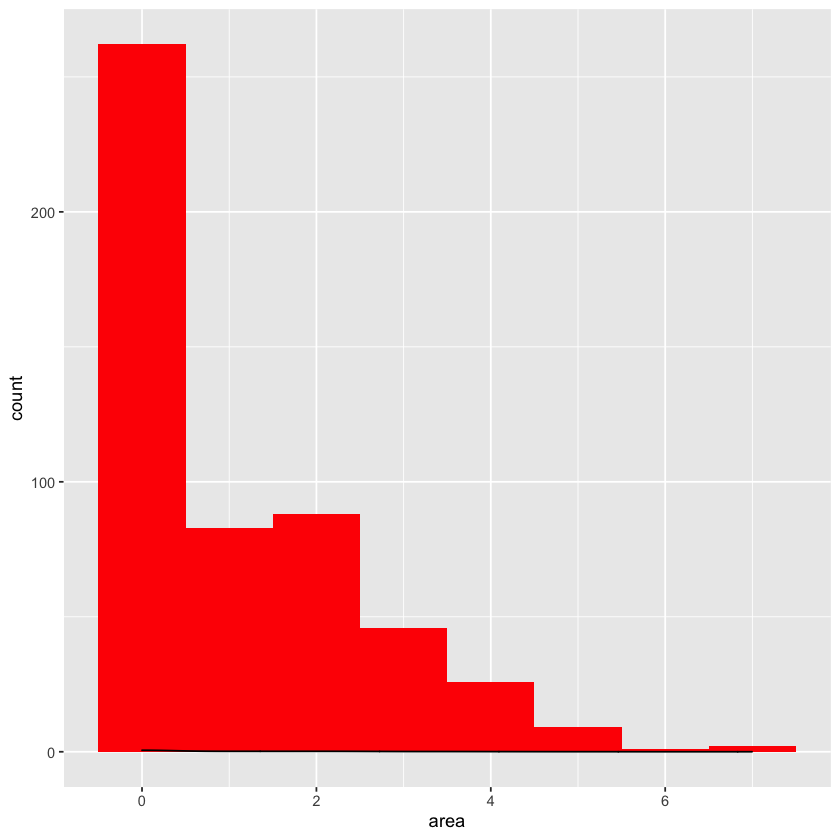

In [15]:
df2$area[which(is.infinite(df2$area))] <- 0

area <- ggplot(df2,aes(x=area)) +
    geom_histogram(binwidth = 1, fill="red") +
    geom_density(alpha=.2, fill="#FF6666")

area

Introducing the 0 value shows that the dateset at not so normal. Another issue is that it shows data that has negative value but can the negative value truly depict negative rainfall? also gain there is the case that data has recorded almost more 0 values that there was no occurences of rain more often. We need to check for the amount of no rainfall.
Again taking into consideration that the data is has missing value and some months have been underreported fue to the missing values.

- The data can be more obscured there can be more 0's than there actually is or less.
- In my inution there should be more 0's 
- Some month under-reported and that rain is a seasonal activity there the data is surely skewed
- Please refer for more information https://en.climate-data.org/europe/portugal-250/
- We will go ahead with this data transformation and later compare it with other transformation

In [16]:
count_values <- table(df2$area)
cat("The total number of times rainfall has not-occured: ",count_values[names(count_values)==0])

The total number of times rainfall has not-occured:  247

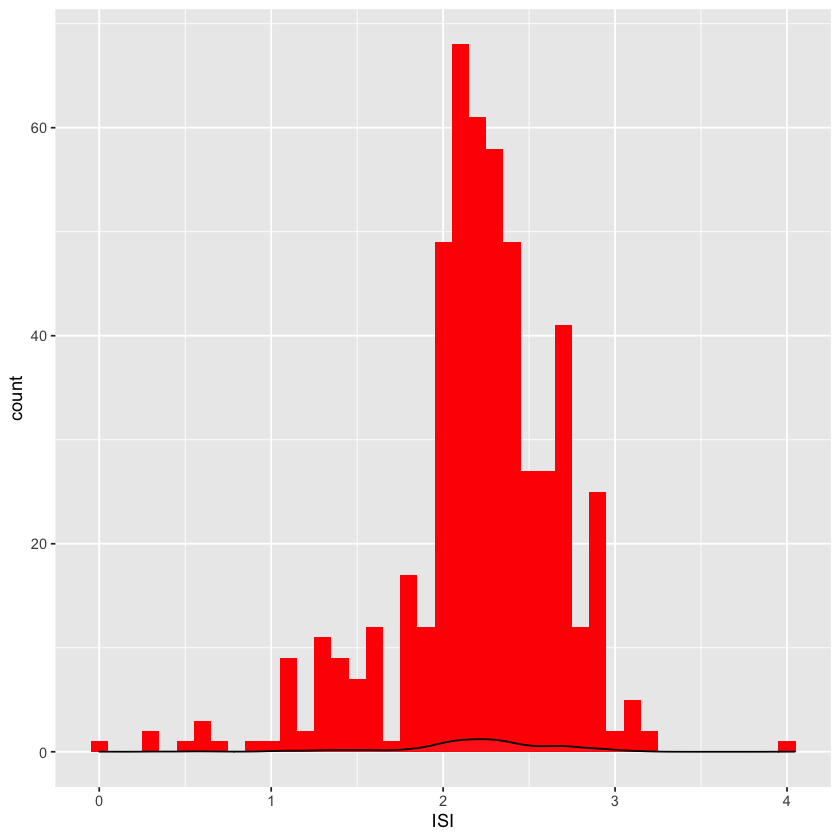

In [17]:
# another transformation that i will look at is the ISI

df2$ISI <- log(df2$ISI + 1) #remove 1
df2$ISI[which(is.infinite(df2$ISI))] <- 0

isi <- ggplot(df2,aes(x=ISI)) +
    geom_histogram(binwidth = .1, fill="red") +
    geom_density(alpha=.2, fill="#FF6666")

isi

**Spatial Analysis:**

The data that has been provided occurs over some geographical location and is also subject to seasonality and on the assumption that simalar geographic location will have the same envrionment to create the same bushfire we will have a look at the how exactly it looks in certain spaces. 

In [18]:
library(reshape)
df3 <- select(forestfires_data, c(X,Y,area))
df3 <- aggregate(df2$area , by=list(df1$Y,df1$X),FUN=mean)
head(df3)


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:tidyr’:

    expand, smiths




,Group.1,Group.2,x
,<int>,<int>,<dbl>
1,2,1,0.4345835
2,3,1,1.6177884
3,4,1,1.3834216
4,5,1,2.5276910
5,2,2,1.1072222
6,3,2,0.0000000


In [19]:
df3 <- cast(df3, Group.1 ~ Group.2, mean)
df3

Using x as value column.  Use the value argument to cast to override this choice



,Group.1,1,2,3,4,5,6,7,8,9
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,0.4345835,1.107222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.6177884,0.000000,2.0255132,1.247441,NaN,0.9181819,1.6723135,1.6487823,NaN
3,4,1.3834216,1.105657,0.6329032,1.400577,0.8538362,1.4466273,1.0631030,2.5787005,3.0252579
4,5,2.5276910,1.238371,0.1652687,1.028696,0.0000000,1.2998071,0.8446009,0.4589613,1.1074231
5,6,NaN,NaN,0.0000000,1.332363,1.0599850,0.7535736,2.2355336,1.2738316,3.7812307
6,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2298244,NaN
7,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4146504


In [20]:
# Treating all NANs as possible zeros
df3[is.na(df3)] <- 0 # All the values that dont have mean will be NAN
df3

,Group.1,1,2,3,4,5,6,7,8,9
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,0.4345835,1.107222,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
2,3,1.6177884,0.000000,2.0255132,1.247441,0.0000000,0.9181819,1.6723135,1.6487823,0.0000000
3,4,1.3834216,1.105657,0.6329032,1.400577,0.8538362,1.4466273,1.0631030,2.5787005,3.0252579
4,5,2.5276910,1.238371,0.1652687,1.028696,0.0000000,1.2998071,0.8446009,0.4589613,1.1074231
5,6,0.0000000,0.000000,0.0000000,1.332363,1.0599850,0.7535736,2.2355336,1.2738316,3.7812307
6,8,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,5.2298244,0.0000000
7,9,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4146504


**Assumption:**

- The co-ordinate data is ordered (i.e the X and Y are pseudo-cordinates that have been encoded in **order**)

**Observations:**

- One observations that we get is that majority of the fire does happen on patch of land
- Another observations that we can make is that all fire prone places are close to each other
- There are some outlier to this places

**Caveat:**

- We have taken the mean accross all the data that has been provided
- The data is incomplete and some seasons are over respresented in the graph
- Y is missing coordinate value 1 and 7 (which are crucial to confirm what we have obesrved in this data)


### Correlation:

Another most importand graph is the correlation plot which can tell us what variables highly influence our predictions and what variables are interreallted to other dependent variable in the same dataset.

In [21]:
library(corrplot)
correlation <- cor(select(df2,-c(month,day)))
correlation

corrplot 0.84 loaded



,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000000,0.539548171,-0.02103927,-0.048384178,-0.08591612,-0.004690768,-0.05125826,0.08522319,0.01879782,0.06538717,0.06199491
Y,0.539548171,1.000000000,-0.04630755,0.007781561,-0.10117777,-0.025794683,-0.02410308,0.06222073,-0.02034085,0.03323410,0.03883821
FFMC,-0.021039272,-0.046307546,1.00000000,0.382618800,0.33051180,0.767719403,0.43153226,-0.30099542,-0.02848481,0.05670153,0.04679856
DMC,-0.048384178,0.007781561,0.38261880,1.000000000,0.68219161,0.407192170,0.46959384,0.07379494,-0.10534225,0.07478998,0.06715274
DC,-0.085916123,-0.101177767,0.33051180,0.682191612,1.00000000,0.335001187,0.49620805,-0.03919165,-0.20346569,0.03586086,0.06635976
ISI,-0.004690768,-0.025794683,0.76771940,0.407192170,0.33500119,1.000000000,0.45074295,-0.18171472,0.06407374,0.06665021,0.00937209
temp,-0.051258262,-0.024103084,0.43153226,0.469593844,0.49620805,0.450742946,1.00000000,-0.52739034,-0.22711622,0.06949055,0.05348655
RH,0.085223194,0.062220731,-0.30099542,0.073794941,-0.03919165,-0.181714723,-0.52739034,1.00000000,0.06941007,0.09975122,-0.05366216
wind,0.018797818,-0.020340852,-0.02848481,-0.105342253,-0.20346569,0.064073738,-0.22711622,0.06941007,1.00000000,0.06111888,0.06697349
rain,0.065387168,0.033234103,0.05670153,0.074789982,0.03586086,0.066650211,0.06949055,0.09975122,0.06111888,1.00000000,0.02331131


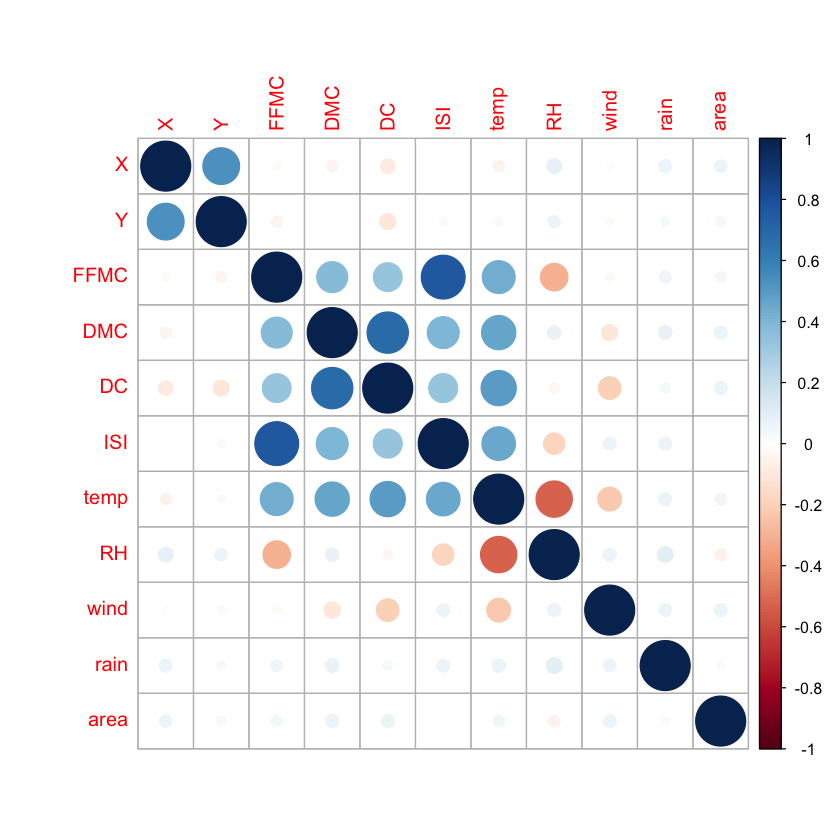

In [22]:
corrplot(correlation)

**Observation:**

- We can see from the table that there is negative correlation between the temp and the Relative Humidity
- Also the Relative Humidity has weakly neagtively correlated to FFMC
- ISI and FFMC are positively correlated
- DC and DMC are really correlated to one another

## 3. Model Development<a class="anchor" id="sec_3"></a>

There some models that can come to mind looking at the data first we can confirm that the data independent variable Y is Continous therefore we need to go ahead with a model that can help in detecting the model a continous values one of the main method that comes to mind is fitting a linear regressor.

In our data n>>p we can be assured there is going to be some bias and high variance

Before we move wiht any model we need to first convert the month and day using One-Hot encoding so that we can use that data on the Linear Regression based model

In [23]:
library(caret)

one_hot <-  dummyVars("~.",data = df2)
df2 <- data.frame(predict(one_hot,newdata=df2))
df2


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




,X,Y,month.apr,month.aug,month.dec,month.feb,month.jan,month.jul,month.jun,month.mar,⋯,day.wed,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,5,0,0,0,0,0,0,0,1,⋯,0,86.2,26.2,94.3,1.8082888,8.2,51,6.7,0.0,0
2,7,4,0,0,0,0,0,0,0,0,⋯,0,90.6,35.4,669.1,2.0412203,18.0,33,0.9,0.0,0
3,7,4,0,0,0,0,0,0,0,0,⋯,0,90.6,43.7,686.9,2.0412203,14.6,33,1.3,0.0,0
4,8,6,0,0,0,0,0,0,0,1,⋯,0,91.7,33.3,77.5,2.3025851,8.3,97,4.0,0.2,0
5,8,6,0,0,0,0,0,0,0,1,⋯,0,89.3,51.3,102.2,2.3608540,11.4,99,1.8,0.0,0
6,8,6,0,1,0,0,0,0,0,0,⋯,0,92.3,85.3,488.0,2.7536607,22.2,29,5.4,0.0,0
7,8,6,0,1,0,0,0,0,0,0,⋯,0,92.3,88.9,495.6,2.2512918,24.1,27,3.1,0.0,0
8,8,6,0,1,0,0,0,0,0,0,⋯,0,91.5,145.4,608.2,2.4595888,8.0,86,2.2,0.0,0
9,8,6,0,0,0,0,0,0,0,0,⋯,0,91.0,129.5,692.6,2.0794415,13.1,63,5.4,0.0,0


**Splitting the Data 80:20 Train test**

In [24]:
length <- nrow(df2)

split_number <-  floor(.80 * length)

set.seed(137) # so that we get consistent result
sampled_index <- sample(seq_len(length), size = split_number )
            
train <- df2[sampled_index,]
test <- df2[-sampled_index,]

Creating the train and test labels

In [25]:
train.label <- as.matrix(train$area)
test.label <- as.matrix(test$area)

We will use this Sample Model to compare weather our newer models perform better than this model or not

In [26]:
sample_model <- lm(area~., data= train)
summary.lm <- summary(sample_model)
summary.lm


Call:
lm(formula = area ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0088 -1.0491 -0.4345  0.8603  5.0424 

Coefficients: (2 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.054415   2.207506   0.478  0.63317   
X            0.053873   0.038526   1.398  0.16281   
Y           -0.008770   0.072295  -0.121  0.90351   
month.apr   -1.172118   1.006496  -1.165  0.24492   
month.aug   -0.709167   0.254943  -2.782  0.00567 **
month.dec    1.019892   0.822673   1.240  0.21583   
month.feb   -1.027539   0.944262  -1.088  0.27719   
month.jan   -1.330876   1.467298  -0.907  0.36496   
month.jul   -0.902753   0.497420  -1.815  0.07032 . 
month.jun   -1.433976   0.730035  -1.964  0.05022 . 
month.mar   -1.638551   0.874109  -1.875  0.06161 . 
month.may   -0.364482   1.310687  -0.278  0.78110   
month.nov   -2.359999   1.694110  -1.393  0.16441   
month.oct   -0.654707   0.497879  -1.315  0.18930   
month.sep  

In [27]:
sample_prediction <- predict(sample_model, newdata = test)
sample_mse <- mean((sample_prediction - test.label)^2) 
cat("The performace of the model (MSE):", sample_mse)

The performace of the model (MSE): 1.563783

This is certainly an overfitted model.

### Model 1: Linear Regression - Subset Selection using only this significant variables

In [28]:
cf <- coef(summary.lm)
cf <- cf[cf[,"Pr(>|t|)"]<0.1,]
all_cf<- c(rownames(cf),"area")
subset.train <- select(train,all_cf)

subset.fit <- lm(subset.train$area ~.,data=subset.train)
summary(subset.fit)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(all_cf)` instead of `all_cf` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.




Call:
lm(formula = subset.train$area ~ ., data = subset.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8486 -1.1112 -0.6208  0.8164  5.6312 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.017195   0.167560   6.071 2.92e-09 ***
month.aug   -0.355760   0.180600  -1.970   0.0495 *  
month.jul   -0.123356   0.292381  -0.422   0.6733    
month.jun   -0.400789   0.428244  -0.936   0.3499    
month.mar   -0.452329   0.254672  -1.776   0.0765 .  
DMC          0.002867   0.001378   2.080   0.0381 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.437 on 407 degrees of freedom
Multiple R-squared:  0.0277,	Adjusted R-squared:  0.01575 
F-statistic: 2.319 on 5 and 407 DF,  p-value: 0.04276


In [29]:
subset.pred <- predict(subset.fit, newdata = test)
sample_mse <- mean(((exp(subset.pred) -1) -((exp(test.label))-1))^2) 
sample_mae <- mean(abs((exp(subset.pred)-1) -(exp(test.label)-1)))
cat("The performace of the model (MAE):", sample_mae)
cat("The performace of the model (MSE):", sample_mse)
cat("The performance of R2: ",summary(subset.fit)$r.squared)

The performace of the model (MAE): 5.580646The performace of the model (MSE): 174.0287The performance of R2:  0.02769579

**Performace:**
- MSE = 174.028
- MAE = 5.580
- R2 = 0.027

The reason it gives a good value can be attributed to the fact that most of the values where fire occurs is in August and therefore the data is predicting the same using the seasonal value (month). This will fit well with the test as well i.e beacuse the data is limited and as mentioned earlier is has a lot of missing values. Many of the issues can only clearfied if there is more data on the same and nothing at this point can be said with certainity about this Data.

### Model 2: Random Forest

The second model that we choose is the model where we are going to use Random Forest - the reason we go ahead with such a model is due to the fact in the following research paper the best model is depicted to be a Decision Tree model What best way of doing a descision tree model than actually using an ensemble based desicion tree.

In [30]:
library(ranger)

rdf.fit <- train(area ~., data = train,
                        trControl = trainControl(method = "cv", number = 5, search = "random"), 
                        tuneLength = 5,
                        method = "ranger",
                        importance = "impurity",
                        preProc = c("range"))

In [31]:
rdf.fit$result

,min.node.size,mtry,splitrule,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1,extratrees,1.438716,0.015178854,1.191953,0.11591401,0.021161814,0.07634195
2,8,8,maxstat,1.453759,0.008996113,1.201053,0.10859742,0.018678900,0.07309107
3,10,9,extratrees,1.495321,0.005752572,1.218735,0.09953307,0.005343804,0.08789303
4,16,21,variance,1.528441,0.007154767,1.258851,0.10461269,0.007030130,0.09346410
5,20,24,extratrees,1.497348,0.007360710,1.223886,0.09485577,0.008796805,0.08394660


From the result we can conclide the R-squared, MAE comes best for the tree node size of 10
But we will let the modle do the predictions and check it on the test dataset

In [37]:
rdf.predict <- predict(rdf.fit,test)
rdf_mse <- mean(((exp(rdf.predict) -1) -((exp(test.label))-1))^2) 
rdf_mae <- mean(abs((exp(rdf.predict)) -(exp(test.label))))
cat("The performace of the model (MAE):", rdf_mae)
cat("The performace of the model (MSE):", rdf_mse)

The performace of the model (MAE): 5.537527The performace of the model (MSE): 174.4619

The performance of the model seems to be near the values of that of the Linear Regresor with the subset but the Random Forest regressor has good performance

**Performance:**

- MAE = 5.537
- MSE = 174.462

In [33]:
actual <- train$area
predicted <- unname(rdf.predict)

cat("Also the RMSE value:",caret::RMSE(predicted,actual))

Also the RMSE value: 1.449371

### Model 3: Support Vector Regression SVR:

Support vector regressor is again used for this model is because as mentioned in the research paper provided this is one of the key model that had performed good. We will use the linear kernel to make the polynomial and set the cost at random to check for the best value. The only drawback is for varying cost we might have to again and again fit the data

In [34]:
library(e1071)
svm.fit = svm(area ~ ., data = train)
svm.fit


Call:
svm(formula = area ~ ., data = train)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.03448276 
    epsilon:  0.1 


Number of Support Vectors:  384


In [35]:
svm.pred <- predict(svmfit, test)
svm_mse <- mean(((exp(svm.pred) -1) -((exp(test.label))-1))^2) 
svm_mae <- mean(abs((exp(svm.pred)-1) -(exp(test.label)-1)))
cat("The performace of the model (MAE):", svm_mae)
cat("The performace of the model (MSE):", svm_mse)

ERROR: Error in predict(svmfit, test): object 'svmfit' not found


From the above performance we can conclude that lasso to certain extents manages to perform closer to the expected valueslike the other models. This model was only included on the pretext that was considred as one of the good modles in the paper

**Performance:**

- MAE = 6.504
- MSE = 188.225


## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

In this assignment we where given Forest Fire Dataset that had been accumulated from portugal. In the paper that did the intial analysis of the Dataset they had mentioned the sporadic way the data had been collected. Looking at the incosistency with the data i choose to implement 3 models:

- **Linear Regression with Subset selection**
- **Random Forrest Regression**
- **Support Vector Regressor**

The where other linear models that where thought of but where **not used**. 

- **Lasso**
- **Ridge**

The reason for not choosing these variables where due to the reason that the number of Dataset values was very less and the number of predictors where much more less than the 30 therefore directly choosing a subset to fit the modle seemed the best linear regression method. The method where also implemented on this book and later on removed due to the very low R-squared value and high MAE.

#### The performance of the models :

##### Linear Regression with Subset:   

- **MAE = 5.580**                 
- **MSE = 174.028**                               

##### Random Forest Regressor:     
- **MAE = 5.537**                  
- **MSE = 174.462**                          

##### Support Vector Regressor:

- **MAE = 6.504**
- **MSE = 188.2246**              

Looking at the result we can conclude that Random Forest Regressor and Linear Model performs the best.
The choice of random forest and the linear regressor where done on the similar grounds of the paper
and because of the ambguity in the data we will use Ocam's Razor and declare Linear Regressor as the model that should be choosen to predict.

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

The variable identification has been minimal in this project the reason for that we only selected one subset based model for which we used **DMC month.jun, month.aug, month,jul, month,mar**

DMC showed almost in all cases even when the intial lasso created as the most prominent model that influenced deciding the fit of the model.

In case of the RandomForest the all values that dont influence the graph are made into zero or some value that cant influence the Fit. Similar can be suggested for the Support Vector regrssor model.

## 6. Conclusion <a class="anchor" id="sec_6"></a>

In this assignment we where given the tasks exploring, analyzing and creating a model of a data. The Data that was provided for the assignment was really noisy and skewed. There where many impedements faced during the exploration and analization faze which came to the foreground when looking at the data. One of the key challenging factor was that the data though being spatial and temporal in had very random values. Even the dates where not followed on the data and the co-ordinates where also missing two whole colums. There where also some assumptions that where made during the creation of the model when of them during the spatial analysis was that the co-ordinates where ordered. The Spatial analysis did reveal a pattern that we where able to see on the table that there was a paticular strip on which the fire had occured.

One of the key variable that influences the Forest fires was found out to be DMC. 

Random Forest was selected as one of the models following closely the research paper and so was SVM. Like the paper the decision tree gave the best result and in our case also the simple regression was one of them too. One key observation of the research was that the model was built on months (paticularly the summer seasonal months) but this can be entirely discredited as the number of August (and similarly other months) values where far more reported than the other values in the Dataset.

To predict more accurately and validates the model in the assignment it is certainly suggested more data is required and also unlike this Dataset the dataset should be ordered and have limited missing value It should overrepresnt some values than the others.

## 7. References <a class="anchor" id="sec_7"></a>

1. Is R-squared Useless? (https://data.library.virginia.edu/is-r-squared-useless/)
2. Bushfire Weather (http://www.bom.gov.au/weather-services/fire-weather-centre/bushfire-weather/index.shtml)
3. Seasonal Rainfall in portugal (https://en.climate-data.org/europe/portugal-250/)
4. Sperating the Bimodal distribution (https://stats.stackexchange.com/questions/26876/separating-the-populations-in-a-bimodal-distribution)